In [1]:
from extract import get_data_from_directory
from preprocessing import preprocess, train_regressor_for_native_vision

In [2]:
data = list(get_data_from_directory('./decoded'))

нативно зрение
нативно зрение 'ст.д.' = стенопеична дупка може да се махне
'с' = с корекция от или 'снк' = с негова корекция
'дсф' - диоптер сфера
първо сферата, после цилиндър
'дц' или 'дцил' - диоптер цилиндър, след дц винаги има номер на градуси

'1/~' = <0.001
ППЛцерта = перцепцио луцис ет проекцио луцис церта = правилна проекция на светлината

това са условни изводи, защото не всички идват на преглед

In [3]:
data = preprocess(data)

In [4]:
data[0]

{'date': datetime.datetime(2018, 10, 1, 0, 0),
 'paid': True,
 'sex': 'f',
 'birth': datetime.datetime(1962, 8, 9, 0, 0),
 'insurance': True,
 'main_diag': 'H52.4',
 'procedures': ['89.03'],
 'visit_type': 'consult',
 'age': 56,
 'right_native': None,
 'correction_right_sphere': '+0.4',
 'correction_right_cylinder': '0',
 'corrected_right': '1.0',
 'left_native': None,
 'correction_left_sphere': '+0.5',
 'correction_left_cylinder': '0',
 'corrected_left': '1.0'}

In [4]:
all_diag = list(set([d['main_diag'] for d in data]))
all_diag_to_ind = {k: v for v, k in enumerate(all_diag)}

In [100]:
regressor = train_regressor_for_native_vision(data)
regressor([-2, 0, 1])

0.268

In [139]:
import numpy as np

# "age"
# "paid"
# "sex"
# "insurance"
# "main_diag"
# "procedures"
# "visit_type"
# 'corrected_right'

# 'corrected_left'

def sight_to_num(sight_str):
    num = 0
    try:
        num = float(sight_str)
    except: pass
    return num

def get_sight_from_h_state(h_state_dict):
    left = sight_to_num(h_state_dict['corrected_left']) if h_state_dict['corrected_left'] != None else sight_to_num(h_state_dict['left_native'])
    right = sight_to_num(h_state_dict['corrected_right']) if h_state_dict['corrected_right'] != None else sight_to_num(h_state_dict['right_native'])
    return left, right

def vectorize(data):
    return np.array([[
        int(d['age'])/100,
        # 0 if d['sex'] == 'm' else 1,
        # all_diag_to_ind[d['main_diag']]/len(all_diag),
        min(*get_sight_from_h_state(parse_h_state(d['h_state'])))
    ] for d in data])

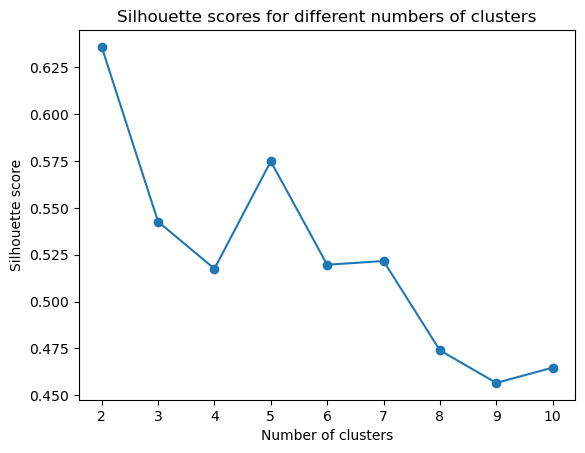

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []
X = vectorize(data)

for n_clusters in range_n_clusters:
    # Create KMeans instance
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for different numbers of clusters')
plt.xticks(range_n_clusters)
plt.show()

In [148]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
kmeans.fit(X)
kmeans.cluster_centers_

array([[0.6722432 , 0.02435869],
       [0.20766355, 0.94941589],
       [0.61408046, 0.95541872],
       [0.14360382, 0.05837709],
       [0.68684624, 0.50094276]])

Идеи за правила:
години и зрение след корекция -> диагноза
зрение преди корекция и зрение след корекция -> диагноза

Един пациент, може да има много прегледи и извадката не е представителна